<a href="https://colab.research.google.com/github/lava-chen/chuangxun_2024/blob/cxy-code/FY3G_station_track.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title 加载依赖项
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [1]:
# @title 链接云盘
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title 加载数据
data_FY3G_6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/2024_6.csv')
data_station = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/station.csv')
print("data loaded!")



data loaded!


In [4]:
# @title 站点时间筛选六月数据
data_station['time_station']=pd.to_datetime(data_station['UTC时间'], format='%Y/%m/%d %H:%M')
data_station_6=data_station[data_station['time_station'].dt.month == 6]

In [5]:
# @title 筛选六月卫星数据
data_FY3G_6 = data_FY3G_6[
    (data_FY3G_6['Year'] > 0 ) &
    (data_FY3G_6['Month'] != -99) &
    (data_FY3G_6['Day'] != -99) &
    (data_FY3G_6['Hour'] != -99) &
    (data_FY3G_6['Minute'] != -99) &
    (data_FY3G_6['Second'] != -99)
]

In [15]:
# @title 确认matplotlib字体
import matplotlib
!apt-get install -y fonts-noto-cjk
!fc-cache -fv
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

for i in a:
    print(i)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/opentype/noto: caching, new cache contents: 30 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/opentype: skipping, looped directory detected
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share

In [ ]:
# @title 确认plotly样式
import plotly
print(plotly.io.templates)

In [ ]:
#@title 安装库
!pip install cartopy
import cartopy

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 20845 (\N{CJK UNIFIED IDEOGRAPH-516D}) missing from current font.
  super()._update_title_position(renderer)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  super()._update_title_position(renderer)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  super()._update_title_position(renderer)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from current font.
  super()._update_title_position(renderer)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  super()._update_title_position(renderer)
/usr/local/lib/pytho

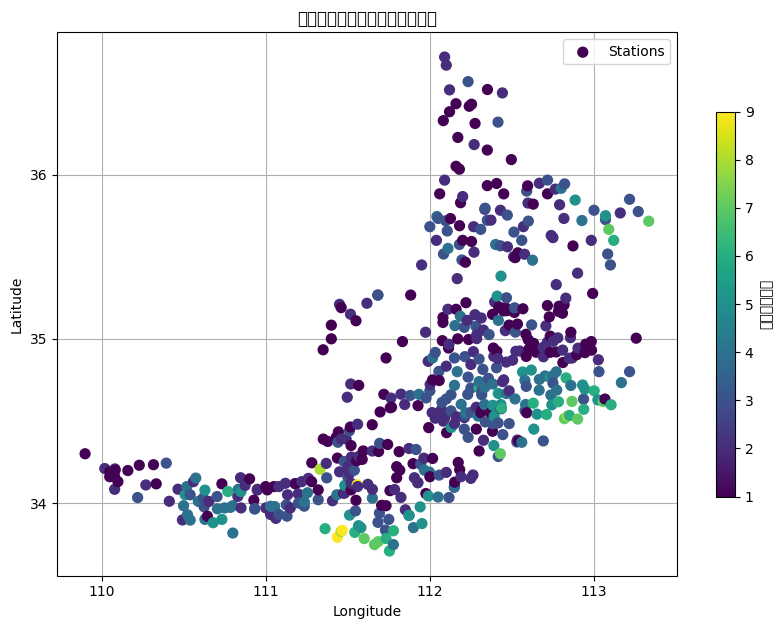

In [17]:
# @title 六月三花间降水量多站点分布图matplotlib绘制
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import seaborn as sns
station_counts = data_station_6.groupby(['lon', 'lat']).size().reset_index(name='count')

station_lon = station_counts['lon']
station_lat = station_counts['lat']
counts = station_counts['count']

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.grid()

ax.set_xticks(range(-180, 181, 1), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 1), crs=ccrs.PlateCarree())

scatter = ax.scatter(station_lon, station_lat, c=counts,  s=50, label='Stations', zorder=5)
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label('重复出现次数')

ax.set_title('六月三花间降水量多站点分布图')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

plt.show()

In [18]:
# @title 六月三花间降水量多站点分布图plotly绘制
import plotly.express as px

station_counts = data_station_6.groupby(['lon', 'lat']).size().reset_index(name='count')
fig = px.scatter_geo(station_counts,
                     lon='lon',
                     lat='lat',
                     size='count',
                     title='六月三花间降水量多站点分布图',
                     labels={'lon': '经度', 'lat': '纬度', 'count': '出现次数'},
                     hover_name='count',
                     template='presentation')
fig.update_geos(showcoastlines=True, coastlinecolor='Black')
fig.update_layout(xaxis_title='Longitude', yaxis_title='Latitude')


fig.show()




In [19]:
# @title 筛选卫星在三花间的轨迹数据
data_FY3G_6_close = data_FY3G_6[
    (data_FY3G_6["Latitude_0"] > 33) & (data_FY3G_6["Latitude_0"] < 37) &
    (data_FY3G_6["Longitude_0"] > 109.5) & (data_FY3G_6["Longitude_0"] < 113.5)
]

In [22]:
# @title 时间序列数据处理

data_FY3G_6_close['time']=pd.to_datetime(data_FY3G_6_close[['Year','Month','Day','Hour']])
data_FY3G_6['time']=pd.to_datetime(data_FY3G_6[['Year','Month','Day','Hour']])
time_FY3G = data_FY3G_6_close.groupby(['time']).size().reset_index(name='count')
time_station = data_station_6.groupby(['time_station']).size().reset_index(name='count')
common_times = pd.merge(time_FY3G, time_station, left_on='time', right_on='time_station', how='inner')
print('风云卫星在六月经过三花间，且站点在六月降水量高的时间：\n',common_times['time'])

<ipython-input-22-f697db19e3f2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



风云卫星在六月经过三花间，且站点在六月降水量高的时间：
 0   2024-06-13 12:00:00
1   2024-06-16 11:00:00
2   2024-06-26 07:00:00
3   2024-06-30 05:00:00
Name: time, dtype: datetime64[ns]


/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:498: UserWarning:

Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from current font.

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:498: UserWarning:

Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:498: UserWarning:

Glyph 32428 (\N{CJK UNIFIED IDEOGRAPH-7EAC}) missing from current font.

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:527: UserWarning:

Glyph 36712 (\N{CJK UNIFIED IDEOGRAPH-8F68}) missing from current font.

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:527: UserWarning:

Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:527: UserWarning:

Glyph 21450 (\N{CJK UNIFIED IDEOGRAPH-53CA}) missing from current font.

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:527: Us

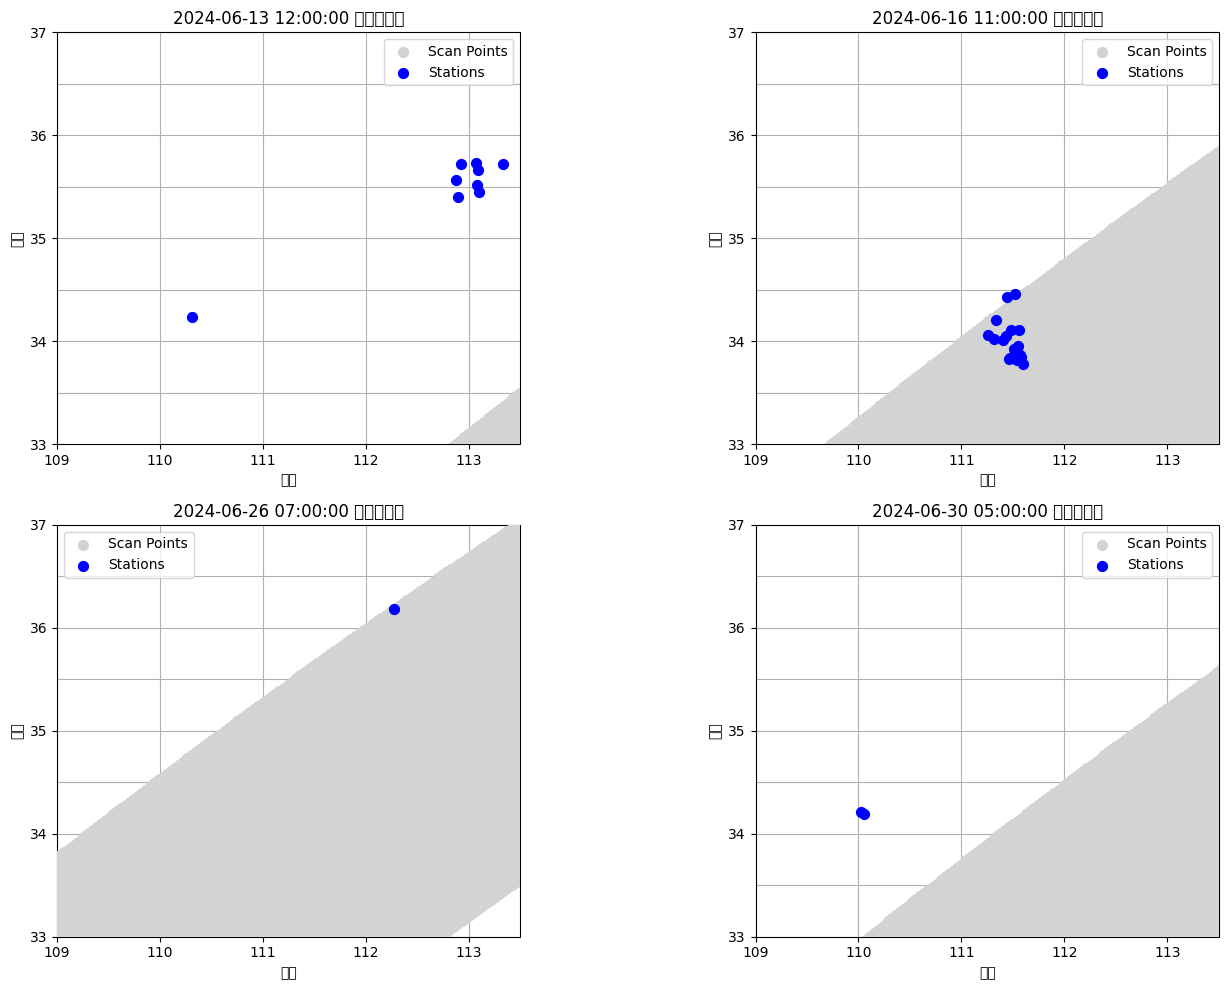

In [26]:
#@title 绘制轨迹图

# 定义要绘制的时间点
time_points = [
    '2024-06-13 12:00:00',
    '2024-06-16 11:00:00',
    '2024-06-26 07:00:00',
    '2024-06-30 05:00:00'
]

lon_min, lon_max = 109.5, 113.5
lat_min, lat_max = 33, 37

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

for ax, time in zip(axs.flatten(), time_points):
    data_FY3G_time = data_FY3G_6[data_FY3G_6['time'] == time]
    data_FY3G_lat = data_FY3G_time[[f'Latitude_{i}' for i in range(59)]].values.flatten()
    data_FY3G_lon = data_FY3G_time[[f'Longitude_{i}' for i in range(59)]].values.flatten()

    station_data_time = data_station_6[data_station_6['time_station'] == time]
    station_lat = station_data_time['lat']
    station_lon = station_data_time['lon']

    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    ax.coastlines()
    ax.gridlines()
    ax.set_xticks(range(int(lon_min), int(lon_max) + 1, 1), crs=ccrs.PlateCarree())
    ax.set_yticks(range(int(lat_min), int(lat_max) + 1, 1), crs=ccrs.PlateCarree())


    #ax.set_xticks(range(-180, 181, 1), crs=ccrs.PlateCarree())
    #ax.set_yticks(range(-90, 91, 1), crs=ccrs.PlateCarree())

    ax.scatter(data_FY3G_lon, data_FY3G_lat, s=50, color='lightgray', label='Scan Points', zorder=5)

    ax.scatter(station_lon, station_lat, s=50, color='blue', label='Stations', zorder=6)

    ax.set_title(f'{time} 轨道及站点')
    ax.set_xlabel('经度')
    ax.set_ylabel('纬度')
    ax.legend()

plt.tight_layout()
plt.show()